In [1]:
import torch

In [2]:
t1 = torch.tensor(4.)
t1

tensor(4.)

In [3]:
t1.dtype

torch.float32

In [4]:
t2 = torch.tensor([1.,2,3,4])
t2

tensor([1., 2., 3., 4.])

In [5]:
t2.dtype

torch.float32

In [6]:
t3 = torch.tensor([[5,6],
                   [7,8],
                   [9,10]])
t3

tensor([[ 5,  6],
        [ 7,  8],
        [ 9, 10]])

In [7]:
t3.dtype

torch.int64

In [8]:
t4 = torch.tensor([
    [[11, 12, 13], 
     [13, 14, 15]], 
    [[15, 16, 17], 
     [17, 18, 19.]]])
t4

tensor([[[11., 12., 13.],
         [13., 14., 15.]],

        [[15., 16., 17.],
         [17., 18., 19.]]])

In [9]:
print(t1)

tensor(4.)


In [10]:
t1.shape

torch.Size([])

In [11]:
t2.shape

torch.Size([4])

In [12]:
t3.shape

torch.Size([3, 2])

In [13]:
t4.shape

torch.Size([2, 2, 3])

In [14]:
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)
x,w,b

(tensor(3.), tensor(4., requires_grad=True), tensor(5., requires_grad=True))

In [15]:
y = w*x + b
y

tensor(17., grad_fn=<AddBackward0>)

In [16]:
y.backward()

In [17]:
print("dy/dx:",x.grad)
print("dy/dw:",w.grad)
print("dy/db:",b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


In [18]:
# Create a tensor with fixed value for every element
t6 = torch.full((3,2),42)
t6

tensor([[42, 42],
        [42, 42],
        [42, 42]])

In [19]:
t3

tensor([[ 5,  6],
        [ 7,  8],
        [ 9, 10]])

In [20]:
t7 = torch.cat((t3,t6))
t7

tensor([[ 5,  6],
        [ 7,  8],
        [ 9, 10],
        [42, 42],
        [42, 42],
        [42, 42]])

In [21]:
t8 = torch.sin(t7)
t8

tensor([[-0.9589, -0.2794],
        [ 0.6570,  0.9894],
        [ 0.4121, -0.5440],
        [-0.9165, -0.9165],
        [-0.9165, -0.9165],
        [-0.9165, -0.9165]])

In [22]:
t8.shape

torch.Size([6, 2])

In [24]:
t9 = t8.reshape((3,2,2))
t9

tensor([[[-0.9589, -0.2794],
         [ 0.6570,  0.9894]],

        [[ 0.4121, -0.5440],
         [-0.9165, -0.9165]],

        [[-0.9165, -0.9165],
         [-0.9165, -0.9165]]])

In [27]:
import numpy as np

x = np.array([[1,2],[3,4.]])
x

array([[1., 2.],
       [3., 4.]])

In [28]:
# Convert the numpy array into a torch tesor
y = torch.from_numpy(x)
y

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [29]:
x.dtype, y.dtype

(dtype('float64'), torch.float64)

In [30]:
z = y.numpy()
z

array([[1., 2.],
       [3., 4.]])

In [2]:
import numpy as np
import torch

In [3]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

In [4]:
inputs

array([[ 73.,  67.,  43.],
       [ 91.,  88.,  64.],
       [ 87., 134.,  58.],
       [102.,  43.,  37.],
       [ 69.,  96.,  70.]], dtype=float32)

In [5]:
# Targets (apples, oranges)
targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype='float32')

In [6]:
targets

array([[ 56.,  70.],
       [ 81., 101.],
       [119., 133.],
       [ 22.,  37.],
       [103., 119.]], dtype=float32)

In [7]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [8]:
# Weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[-0.1290, -0.0435,  0.0042],
        [-1.4062,  0.0026,  0.6521]], requires_grad=True)
tensor([-0.1105, -0.2009], requires_grad=True)


In [9]:
inputs @ w.t() + b 

tensor([[ -12.2576,  -74.6383],
        [ -15.4035,  -86.2006],
        [ -16.9143,  -84.3682],
        [ -14.9792, -119.3941],
        [ -12.8887,  -51.3302]], grad_fn=<AddBackward0>)

In [10]:
def model(x):
    return x @ w.t() + b

In [39]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[ 12.5431, -28.1839],
        [ 17.2357, -25.1786],
        [ 21.9996, -12.3683],
        [  9.3082, -72.9997],
        [ 18.6389,   7.0820]], grad_fn=<AddBackward0>)


In [40]:
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [41]:
diff = preds - targets
diff

tensor([[ -43.4569,  -98.1839],
        [ -63.7643, -126.1786],
        [ -97.0004, -145.3683],
        [ -12.6918, -109.9997],
        [ -84.3611, -111.9180]], grad_fn=<SubBackward0>)

In [42]:
torch.sum(diff*diff) /diff.numel()

tensor(9396.0010, grad_fn=<DivBackward0>)

In [43]:
# MSE Loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff*diff) / diff.numel()

In [44]:
# Compute loss
loss = mse(preds, targets)
loss

tensor(9396.0010, grad_fn=<DivBackward0>)

In [45]:
# Compute gradients
loss.backward()

In [46]:
# Gradients for weights
print(w)
print(w.grad)

tensor([[ 0.0063,  0.1173,  0.1008],
        [-1.1357,  0.2878,  0.8287]], requires_grad=True)
tensor([[ -4905.8853,  -6033.0688,  -3590.0928],
        [-10047.8076, -10527.1035,  -6526.5908]])


In [47]:
print(b)
print(b.grad)

tensor([-0.1089, -0.1978], requires_grad=True)
tensor([ -60.2549, -118.3297])


In [48]:
w - w.grad * 1e-5

tensor([[ 0.0554,  0.1776,  0.1367],
        [-1.0352,  0.3931,  0.8940]], grad_fn=<SubBackward0>)

In [49]:
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5

In [50]:
w, b

(tensor([[ 0.0554,  0.1776,  0.1367],
         [-1.0352,  0.3931,  0.8940]], requires_grad=True),
 tensor([-0.1083, -0.1966], requires_grad=True))

In [51]:
# Lets verift that the loss is actually lower
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(6411.7529, grad_fn=<DivBackward0>)


In [52]:
w.grad, b.grad

(tensor([[ -4905.8853,  -6033.0688,  -3590.0928],
         [-10047.8076, -10527.1035,  -6526.5908]]),
 tensor([ -60.2549, -118.3297]))

In [53]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


In [55]:
# Train for 100 epochs
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [56]:
loss

tensor(77.2492, grad_fn=<DivBackward0>)

In [58]:
# Predictions
preds

tensor([[ 60.8701,  68.8484],
        [ 82.6521, 101.5380],
        [111.7239, 133.3324],
        [ 42.5128,  28.8983],
        [ 90.1671, 125.3467]], grad_fn=<AddBackward0>)

In [59]:
# Targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

# Linear Regression using Pytorch built-ins

In [6]:
import torch
import torch.nn as nn
import numpy as np

In [7]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [8]:
inputs

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 74.,  66.,  43.],
        [ 91.,  87.,  65.],
        [ 88., 134.,  59.],
        [101.,  44.,  37.],
        [ 68.,  96.,  71.],
        [ 73.,  66.,  44.],
        [ 92.,  87.,  64.],
        [ 87., 135.,  57.],
        [103.,  43.,  36.],
        [ 68.,  97.,  70.]])

## Dataset and DataLoader

In [16]:
from torch.utils.data import TensorDataset, DataLoader

In [17]:
# Define Dataset
train_ds = TensorDataset(inputs, targets)

In [22]:
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [25]:
# Define DataLoader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [40]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[ 73.,  66.,  44.],
        [ 87., 135.,  57.],
        [ 69.,  96.,  70.],
        [ 88., 134.,  59.],
        [ 91.,  88.,  64.]])
tensor([[ 57.,  69.],
        [118., 134.],
        [103., 119.],
        [118., 132.],
        [ 81., 101.]])


In [30]:
len(train_dl)

3

In [44]:
# Define model
model = nn.Linear(3,2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.0540,  0.4770,  0.0375],
        [ 0.5396, -0.1789,  0.3924]], requires_grad=True)
Parameter containing:
tensor([-0.3573,  0.1746], requires_grad=True)


In [48]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0540,  0.4770,  0.0375],
         [ 0.5396, -0.1789,  0.3924]], requires_grad=True),
 Parameter containing:
 tensor([-0.3573,  0.1746], requires_grad=True)]

In [49]:
# Generate predictions
preds = model(inputs)
preds

tensor([[37.1528, 44.4464],
        [48.9280, 58.6407],
        [70.4289, 45.8978],
        [27.0458, 62.0340],
        [51.7811, 47.6929],
        [36.7298, 45.1649],
        [48.4885, 59.2120],
        [70.5203, 46.8297],
        [27.4688, 61.3155],
        [51.7645, 47.5457],
        [36.7133, 45.0177],
        [48.5050, 59.3592],
        [70.8684, 45.3265],
        [27.0624, 62.1813],
        [52.2041, 46.9744]], grad_fn=<AddmmBackward0>)

In [51]:
# Import nn.functional
import torch.nn.functional as F

In [52]:
# Define loss function
loss_fn = F.mse_loss

In [53]:
loss = loss_fn(preds, targets)
print(loss)

tensor(2200.5947, grad_fn=<MseLossBackward0>)


In [56]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [58]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):

    # Repeat for given number of epochs
    for epoch in range(num_epochs):

        # Train with batches of data
        for xb, yb in train_dl:

            # 1. Generate predictions
            pred = model(xb)

            # 2. Calculate loss
            loss = loss_fn(pred, yb)

            # 3. Compute gradients
            loss.backward()

            # 4. Update parameters using gradients
            opt.step()

            # 5. Reset the gradients to zero
            opt.zero_grad()

        #Print the progress
        if (epoch+1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss : {loss.item()}")

In [59]:
fit(100, model, loss_fn, opt, train_dl)

Epoch [10/100], Loss : 784.53076171875
Epoch [20/100], Loss : 327.808837890625
Epoch [30/100], Loss : 55.6944580078125
Epoch [40/100], Loss : 179.01089477539062
Epoch [50/100], Loss : 214.30654907226562
Epoch [60/100], Loss : 35.5077018737793
Epoch [70/100], Loss : 79.85542297363281
Epoch [80/100], Loss : 27.848480224609375
Epoch [90/100], Loss : 26.943523406982422
Epoch [100/100], Loss : 19.080562591552734


In [60]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 57.8879,  71.9954],
        [ 79.6802, 100.1850],
        [121.7656, 130.7409],
        [ 26.5260,  46.9712],
        [ 94.3864, 112.5618],
        [ 56.7099,  71.1462],
        [ 79.0578, 100.1272],
        [121.8341, 131.3236],
        [ 27.7040,  47.8204],
        [ 94.9420, 113.3532],
        [ 57.2655,  71.9376],
        [ 78.5022,  99.3358],
        [122.3880, 130.7987],
        [ 25.9703,  46.1798],
        [ 95.5643, 113.4109]], grad_fn=<AddmmBackward0>)

In [61]:
# Compare with targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

In [62]:
model(torch.tensor([[75, 63, 44.]]))

tensor([[53.9751, 69.4945]], grad_fn=<AddmmBackward0>)

# Images and Linear Regression

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

/home/sijan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F5FB4C23580>, 5)

In [6]:
import matplotlib.pyplot as plt

Label: 5


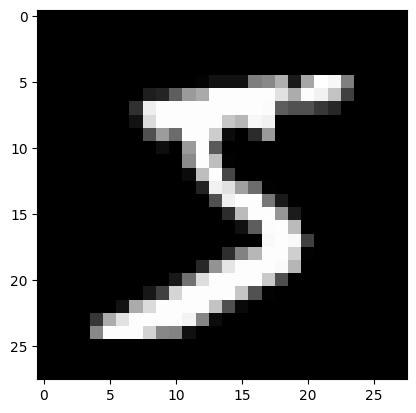

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print("Label:",label)

Label: 3


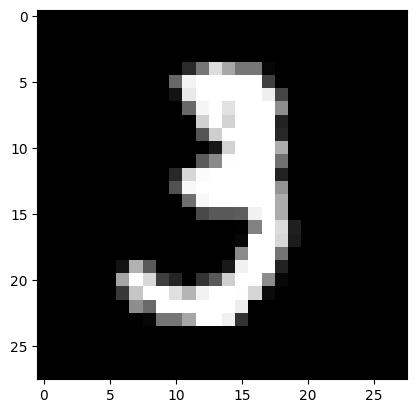

In [8]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print("Label:",label)

In [9]:
import torchvision.transforms as transforms

In [10]:
dataset = MNIST(root="data/", train=True, transform=transforms.ToTensor())

In [11]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [12]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


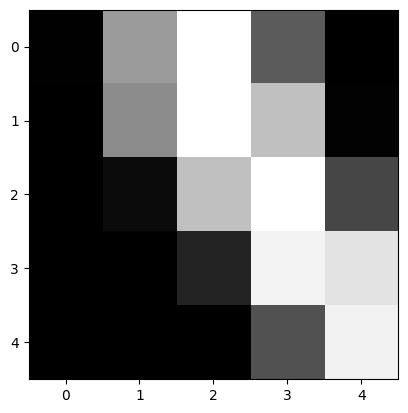

In [13]:
plt.imshow(img_tensor[0,10:15,10:15], cmap="gray")

In [14]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [15]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [16]:
import torch.nn as nn

input_size = 28*28 # 784
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [17]:
model.weight.shape

torch.Size([10, 784])

In [18]:
model.bias.shape

torch.Size([10])

In [19]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images.reshape(128,784))
    break

tensor([9, 1, 5, 0, 9, 3, 7, 5, 6, 6, 2, 5, 5, 1, 3, 9, 4, 7, 4, 4, 7, 2, 9, 3,
        7, 6, 7, 6, 2, 7, 7, 0, 9, 0, 8, 0, 1, 0, 6, 1, 9, 8, 4, 5, 1, 3, 3, 3,
        6, 0, 0, 2, 2, 8, 0, 2, 2, 4, 9, 2, 0, 2, 1, 8, 1, 4, 0, 1, 4, 0, 1, 9,
        6, 8, 2, 5, 4, 9, 8, 3, 2, 9, 2, 5, 0, 8, 3, 3, 1, 4, 5, 0, 1, 9, 7, 6,
        2, 1, 6, 7, 2, 1, 3, 5, 5, 4, 2, 5, 9, 8, 0, 6, 6, 7, 8, 0, 0, 1, 6, 8,
        4, 2, 0, 2, 7, 8, 4, 7])
torch.Size([128, 1, 28, 28])


In [20]:
images.reshape(128,784).shape

torch.Size([128, 784])

In [21]:
outputs.shape

torch.Size([128, 10])

In [22]:
outputs[0,0:]

tensor([-0.4251, -0.0985,  0.1308, -0.5382,  0.1589, -0.0018, -0.4069,  0.1543,
        -0.0433, -0.1953], grad_fn=<SliceBackward0>)

In [23]:
class Person:
    # Class constructor
    def __init__(self, name, age):
        # Object properties
        self.name = name
        self.age = age

    #Method
    def say_hello(self):
        print("Hello, my name is "+self.name+" !")

In [24]:
bob = Person("Bob", 32)

In [25]:
bob.say_hello()

Hello, my name is Bob !


In [26]:
bob.name, bob.age

('Bob', 32)

In [27]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

In [28]:
model = MnistModel()

In [29]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [30]:
model.linear.weight.shape, model.linear.bias.shape

(torch.Size([10, 784]), torch.Size([10]))

In [31]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0036,  0.0213, -0.0152,  ..., -0.0244, -0.0260,  0.0145],
         [-0.0170,  0.0218, -0.0337,  ...,  0.0290,  0.0014,  0.0224],
         [ 0.0246, -0.0114,  0.0329,  ..., -0.0265, -0.0248, -0.0156],
         ...,
         [-0.0028,  0.0100,  0.0056,  ..., -0.0186,  0.0139,  0.0023],
         [ 0.0112,  0.0259,  0.0295,  ..., -0.0302, -0.0041, -0.0175],
         [-0.0292,  0.0031,  0.0312,  ..., -0.0297, -0.0299,  0.0116]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0027,  0.0141,  0.0035,  0.0310, -0.0093,  0.0148, -0.0346, -0.0165,
          0.0296, -0.0161], requires_grad=True)]

In [32]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape:',outputs.shape)
print('Sample outputs : \n', outputs[:2].data)

outputs.shape: torch.Size([128, 10])
Sample outputs : 
 tensor([[ 0.0519,  0.4390, -0.0527,  0.3390, -0.1046, -0.2053,  0.1171, -0.0621,
         -0.0920, -0.3270],
        [ 0.0263,  0.1691,  0.1144,  0.3489,  0.0289, -0.0553, -0.1935,  0.0023,
         -0.0773, -0.1635]])


In [33]:
import torch.nn.functional as F

In [34]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probablilies of an output row
print("Sum: ",torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1016, 0.1496, 0.0915, 0.1354, 0.0869, 0.0785, 0.1084, 0.0906, 0.0880,
         0.0695],
        [0.0994, 0.1147, 0.1086, 0.1373, 0.0997, 0.0916, 0.0798, 0.0971, 0.0896,
         0.0822]])
Sum:  1.0000001192092896


In [35]:
max_probs, preds = torch.max(probs, dim=1)

In [36]:
print(max_probs.data)
print(preds)

tensor([0.1496, 0.1373, 0.1174, 0.1340, 0.1339, 0.1256, 0.1403, 0.1576, 0.1530,
        0.1491, 0.1410, 0.1273, 0.1299, 0.1270, 0.1324, 0.1505, 0.1135, 0.1347,
        0.1216, 0.1327, 0.1391, 0.1311, 0.1398, 0.1450, 0.1219, 0.1259, 0.1267,
        0.1274, 0.1444, 0.1530, 0.1196, 0.1275, 0.1621, 0.1252, 0.1309, 0.1298,
        0.1275, 0.1482, 0.1301, 0.1286, 0.1404, 0.1340, 0.1376, 0.1421, 0.1486,
        0.1280, 0.1226, 0.1357, 0.1278, 0.1220, 0.1260, 0.1264, 0.1518, 0.1181,
        0.1280, 0.1384, 0.1305, 0.1259, 0.1217, 0.1264, 0.1525, 0.1334, 0.1251,
        0.1595, 0.1463, 0.1529, 0.1419, 0.1263, 0.1222, 0.1546, 0.1339, 0.1453,
        0.1231, 0.1521, 0.1189, 0.1268, 0.1349, 0.1210, 0.1205, 0.1177, 0.1200,
        0.1222, 0.1406, 0.1358, 0.1412, 0.1502, 0.1456, 0.1354, 0.1786, 0.1572,
        0.1243, 0.1256, 0.1260, 0.1520, 0.1331, 0.1320, 0.1591, 0.1225, 0.1265,
        0.1319, 0.1225, 0.1428, 0.1142, 0.1364, 0.1201, 0.1205, 0.1346, 0.1103,
        0.1451, 0.1429, 0.1224, 0.1189, 

In [37]:
labels

tensor([6, 2, 7, 7, 4, 7, 7, 6, 3, 5, 1, 5, 8, 4, 9, 8, 9, 4, 5, 4, 3, 4, 9, 2,
        1, 6, 5, 7, 9, 5, 8, 9, 2, 6, 8, 3, 3, 3, 4, 5, 3, 2, 5, 4, 8, 1, 4, 5,
        2, 9, 4, 1, 0, 3, 7, 5, 6, 8, 5, 8, 2, 7, 3, 5, 6, 0, 2, 8, 9, 2, 7, 2,
        2, 0, 3, 6, 9, 1, 1, 5, 0, 1, 0, 0, 2, 5, 2, 9, 5, 0, 4, 1, 1, 1, 6, 8,
        4, 0, 9, 7, 4, 3, 7, 0, 5, 9, 5, 4, 0, 0, 4, 1, 1, 1, 3, 0, 3, 7, 2, 7,
        6, 8, 4, 7, 7, 4, 6, 1])

# Evaluate Metric and Loss function

In [38]:
outputs

tensor([[ 0.0519,  0.4390, -0.0527,  ..., -0.0621, -0.0920, -0.3270],
        [ 0.0263,  0.1691,  0.1144,  ...,  0.0023, -0.0773, -0.1635],
        [-0.0406,  0.0824, -0.1206,  ..., -0.0765, -0.0725, -0.3007],
        ...,
        [-0.1559,  0.0413, -0.2049,  ..., -0.1096, -0.0621, -0.0586],
        [-0.1353,  0.0802, -0.1019,  ..., -0.0971,  0.0830, -0.1785],
        [ 0.1154,  0.2231, -0.0647,  ...,  0.0503,  0.0447, -0.0946]],
       grad_fn=<AddmmBackward0>)

In [39]:
labels

tensor([6, 2, 7, 7, 4, 7, 7, 6, 3, 5, 1, 5, 8, 4, 9, 8, 9, 4, 5, 4, 3, 4, 9, 2,
        1, 6, 5, 7, 9, 5, 8, 9, 2, 6, 8, 3, 3, 3, 4, 5, 3, 2, 5, 4, 8, 1, 4, 5,
        2, 9, 4, 1, 0, 3, 7, 5, 6, 8, 5, 8, 2, 7, 3, 5, 6, 0, 2, 8, 9, 2, 7, 2,
        2, 0, 3, 6, 9, 1, 1, 5, 0, 1, 0, 0, 2, 5, 2, 9, 5, 0, 4, 1, 1, 1, 6, 8,
        4, 0, 9, 7, 4, 3, 7, 0, 5, 9, 5, 4, 0, 0, 4, 1, 1, 1, 3, 0, 3, 7, 2, 7,
        6, 8, 4, 7, 7, 4, 6, 1])

In [40]:
preds == labels

tensor([False, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,  True,
        False,  True, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False])

In [41]:
torch.sum(preds == labels)

tensor(9)

In [42]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds==labels).item() / len(preds))

In [43]:
accuracy(outputs, labels)

tensor(0.0703)

In [44]:
x = torch.tensor([0.1, 0.5, 0.4])
x

tensor([0.1000, 0.5000, 0.4000])

In [45]:
y = torch.tensor([0,1.,0])
y

tensor([0., 1., 0.])

In [46]:
-y @ torch.log(x)

tensor(0.6931)

In [47]:
loss_fn = F.cross_entropy

In [48]:
outputs

tensor([[ 0.0519,  0.4390, -0.0527,  ..., -0.0621, -0.0920, -0.3270],
        [ 0.0263,  0.1691,  0.1144,  ...,  0.0023, -0.0773, -0.1635],
        [-0.0406,  0.0824, -0.1206,  ..., -0.0765, -0.0725, -0.3007],
        ...,
        [-0.1559,  0.0413, -0.2049,  ..., -0.1096, -0.0621, -0.0586],
        [-0.1353,  0.0802, -0.1019,  ..., -0.0971,  0.0830, -0.1785],
        [ 0.1154,  0.2231, -0.0647,  ...,  0.0503,  0.0447, -0.0946]],
       grad_fn=<AddmmBackward0>)

In [49]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3178, grad_fn=<NllLossBackward0>)


In [50]:
loss

tensor(2.3178, grad_fn=<NllLossBackward0>)

In [51]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        images,labels = batch
        out = self(images)     # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss':loss, 'val_acc':acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [52]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [53]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.317589521408081, 'val_acc': 0.12183544039726257}

In [54]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9491, val_acc: 0.6206
Epoch [1], val_loss: 1.6795, val_acc: 0.7209
Epoch [2], val_loss: 1.4786, val_acc: 0.7583
Epoch [3], val_loss: 1.3270, val_acc: 0.7812
Epoch [4], val_loss: 1.2103, val_acc: 0.7959


In [55]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1186, val_acc: 0.8075
Epoch [1], val_loss: 1.0450, val_acc: 0.8149
Epoch [2], val_loss: 0.9848, val_acc: 0.8213
Epoch [3], val_loss: 0.9346, val_acc: 0.8280
Epoch [4], val_loss: 0.8923, val_acc: 0.8329


In [56]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8560, val_acc: 0.8370
Epoch [1], val_loss: 0.8247, val_acc: 0.8412
Epoch [2], val_loss: 0.7972, val_acc: 0.8432
Epoch [3], val_loss: 0.7729, val_acc: 0.8470
Epoch [4], val_loss: 0.7513, val_acc: 0.8493


In [57]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7320, val_acc: 0.8518
Epoch [1], val_loss: 0.7145, val_acc: 0.8531
Epoch [2], val_loss: 0.6986, val_acc: 0.8550
Epoch [3], val_loss: 0.6842, val_acc: 0.8563
Epoch [4], val_loss: 0.6710, val_acc: 0.8578


In [58]:
history = [result0] + history1 + history2 + history3 + history4

In [59]:
history

[{'val_loss': 2.317589521408081, 'val_acc': 0.12183544039726257},
 {'val_loss': 1.949078917503357, 'val_acc': 0.6206487417221069},
 {'val_loss': 1.6795355081558228, 'val_acc': 0.7209256291389465},
 {'val_loss': 1.4786018133163452, 'val_acc': 0.7583069801330566},
 {'val_loss': 1.3269551992416382, 'val_acc': 0.7811511158943176},
 {'val_loss': 1.210316777229309, 'val_acc': 0.7958860993385315},
 {'val_loss': 1.118599534034729, 'val_acc': 0.8074564933776855},
 {'val_loss': 1.0449753999710083, 'val_acc': 0.8148733973503113},
 {'val_loss': 0.9847773313522339, 'val_acc': 0.8213014006614685},
 {'val_loss': 0.9346291422843933, 'val_acc': 0.8280261158943176},
 {'val_loss': 0.8922788500785828, 'val_acc': 0.8328718543052673},
 {'val_loss': 0.8560250997543335, 'val_acc': 0.8370253443717957},
 {'val_loss': 0.824652373790741, 'val_acc': 0.8411787748336792},
 {'val_loss': 0.7971543073654175, 'val_acc': 0.843156635761261},
 {'val_loss': 0.7728850245475769, 'val_acc': 0.8470134735107422},
 {'val_loss': 0

Text(0.5, 1.0, 'Accuracy vs No. of epochs')

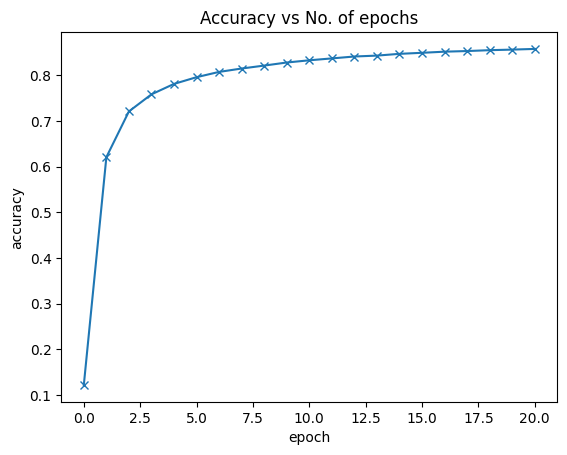

In [60]:
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies,'-x')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Accuracy vs No. of epochs")

## Testing with individual images

In [61]:
# Define test dataset
test_dataset = MNIST(root='data/', train=False, transform=transforms.ToTensor())

Shape:  torch.Size([1, 28, 28])
Label:  7


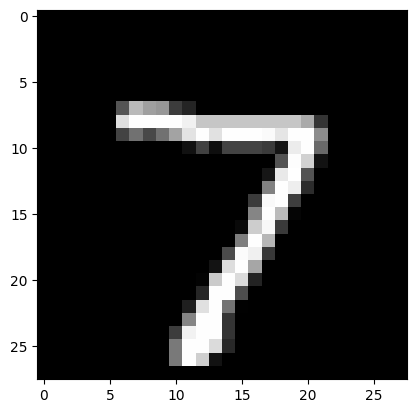

In [62]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap="gray")
print("Shape: ",img.shape )
print("Label: ",label)

In [63]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [65]:
model(img)

tensor([[-0.0816, -1.9390, -0.5859,  0.0372, -0.0685, -0.4725, -1.8727,  4.4400,
         -0.3999,  1.4843]], grad_fn=<AddmmBackward0>)

In [66]:
model(img.unsqueeze(0))

tensor([[-0.0816, -1.9390, -0.5859,  0.0372, -0.0685, -0.4725, -1.8727,  4.4400,
         -0.3999,  1.4843]], grad_fn=<AddmmBackward0>)

In [69]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

In [73]:
torch.max(model(img.unsqueeze(0)), dim=1)

torch.return_types.max(
values=tensor([4.4400], grad_fn=<MaxBackward0>),
indices=tensor([7]))

Label:  7 , Predicted 7


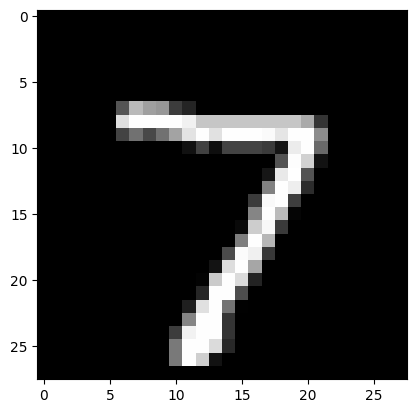

In [74]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap="gray")
print("Label: ",label, ", Predicted",predict_image(img,model))

Label:  0 , Predicted 0


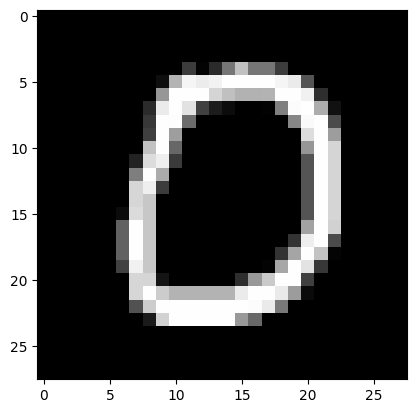

In [76]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap="gray")
print("Label: ",label, ", Predicted",predict_image(img,model))

Label:  9 , Predicted 9


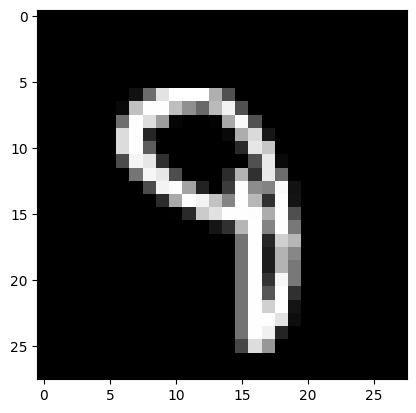

In [77]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap="gray")
print("Label: ",label, ", Predicted",predict_image(img,model))

Label:  2 , Predicted 8


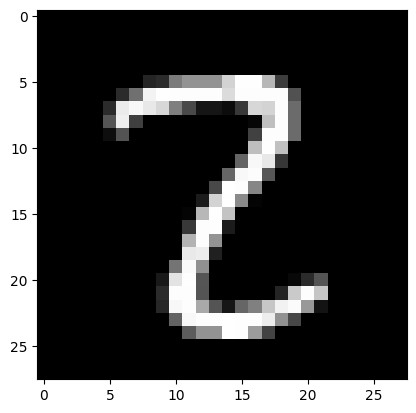

In [78]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap="gray")
print("Label: ",label, ", Predicted",predict_image(img,model))

In [79]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6404193639755249, 'val_acc': 0.86181640625}

# Saving and Loading our model

In [80]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0104, -0.0323, -0.0189,  ...,  0.0193, -0.0021,  0.0049],
                      [-0.0035,  0.0350,  0.0290,  ..., -0.0130,  0.0246,  0.0174],
                      [-0.0189,  0.0011,  0.0219,  ..., -0.0252,  0.0048, -0.0192],
                      ...,
                      [ 0.0238,  0.0344,  0.0275,  ...,  0.0058,  0.0142, -0.0120],
                      [-0.0140,  0.0006, -0.0328,  ..., -0.0080, -0.0187,  0.0313],
                      [-0.0135,  0.0326,  0.0097,  ...,  0.0019,  0.0317,  0.0133]])),
             ('linear.bias',
              tensor([-0.0281,  0.1280, -0.0518, -0.0350,  0.0278,  0.0129,  0.0193,  0.0169,
                      -0.0744, -0.0398]))])

In [81]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [82]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0104, -0.0323, -0.0189,  ...,  0.0193, -0.0021,  0.0049],
                      [-0.0035,  0.0350,  0.0290,  ..., -0.0130,  0.0246,  0.0174],
                      [-0.0189,  0.0011,  0.0219,  ..., -0.0252,  0.0048, -0.0192],
                      ...,
                      [ 0.0238,  0.0344,  0.0275,  ...,  0.0058,  0.0142, -0.0120],
                      [-0.0140,  0.0006, -0.0328,  ..., -0.0080, -0.0187,  0.0313],
                      [-0.0135,  0.0326,  0.0097,  ...,  0.0019,  0.0317,  0.0133]])),
             ('linear.bias',
              tensor([-0.0281,  0.1280, -0.0518, -0.0350,  0.0278,  0.0129,  0.0193,  0.0169,
                      -0.0744, -0.0398]))])

In [83]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6404193639755249, 'val_acc': 0.86181640625}

# Training Neural Network on GPU

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
from torch.utils.data import random_split


In [2]:
dataset = MNIST(root='data/', download=True, transform=ToTensor())

In [3]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(50000, 10000)

In [4]:
batch_size = 128

In [5]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

images.shape: torch.Size([128, 1, 28, 28])


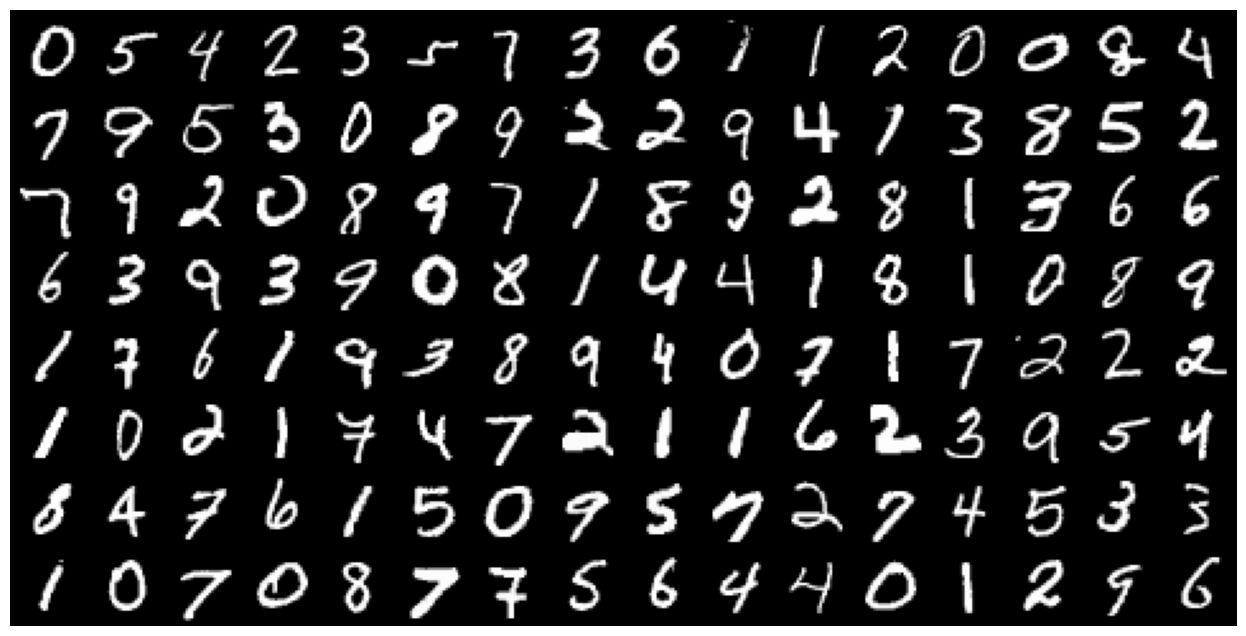

In [6]:
for images, _ in train_loader:
    print("images.shape:",images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute(1,2,0))
    break

In [7]:
make_grid(images, nrow=16).shape

torch.Size([3, 242, 482])

In [8]:
make_grid(images, nrow=16).permute(1,2,0).shape

torch.Size([242, 482, 3])

In [9]:
for images, labels in train_loader:
    print('images.shape: ',images.shape)
    inputs = images.reshape(-1,784)
    print('inputs.shape: ',inputs.shape)
    break

images.shape:  torch.Size([128, 1, 28, 28])
inputs.shape:  torch.Size([128, 784])


In [10]:
inputs_size = inputs.shape[-1]
hidden_size = 32

In [11]:
inputs_size

784

In [12]:
layer1 = nn.Linear(inputs_size, hidden_size)

In [13]:
layer1_outputs = layer1(inputs)
print("layer1_outputs.shape: ",layer1_outputs.shape)

layer1_outputs.shape:  torch.Size([128, 32])


In [14]:
torch.allclose(layer1_outputs, inputs @ layer1.weight.t() + layer1.bias)

True

In [15]:
F.relu(torch.tensor([[1, -1, 0],
                     [-0.1, .2, 3]]))

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 3.0000]])

In [16]:
torch.min(layer1_outputs)

tensor(-0.9539, grad_fn=<MinBackward1>)

In [17]:
relu_outputs = F.relu(layer1_outputs)
print('min(layer1_outputs):', torch.min(layer1_outputs).item())
print('min(relu_outputs):', torch.min(relu_outputs).item())

min(layer1_outputs): -0.9538522362709045
min(relu_outputs): 0.0


In [18]:
output_size = 10
layer2 = nn.Linear(hidden_size, output_size)

In [19]:
layer2_outputs = layer2(relu_outputs)
print(layer2_outputs.shape)

torch.Size([128, 10])


In [20]:
F.cross_entropy(layer2_outputs, labels)

tensor(2.3389, grad_fn=<NllLossBackward0>)

In [21]:
# Expanded version of layer2 (F.relu(layer1(inputs)))
outputs = (F.relu(inputs @ layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias)

In [22]:
torch.allclose(outputs, layer2_outputs, 1e-3)

True

In [23]:
layer2_outputs

tensor([[ 0.0805,  0.2130, -0.0380,  ..., -0.0625, -0.1187,  0.1604],
        [ 0.0203,  0.0998, -0.0639,  ...,  0.0162, -0.1588,  0.0876],
        [ 0.1615,  0.0914, -0.1385,  ..., -0.1056, -0.0465,  0.1470],
        ...,
        [ 0.1189,  0.1313, -0.1848,  ..., -0.0383, -0.1883,  0.0978],
        [ 0.0373,  0.0826, -0.0646,  ...,  0.0162, -0.2064,  0.0773],
        [ 0.1001,  0.1439,  0.0056,  ..., -0.1084, -0.1228,  0.0975]],
       grad_fn=<AddmmBackward0>)

In [24]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [25]:
class MnistModel(nn.Module):
    '''Feed forward neural network with one hidden layer '''
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size)

    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # xb = xb.reshape(-1, 784)
        # Get intermediate output using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss':loss, 'val_acc':acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss':epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [26]:
input_size = 784
hidden_size = 32
num_classes = 10

In [27]:
model = MnistModel(input_size, hidden_size, num_classes)

In [28]:
for t in model.parameters():
    print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [29]:
for images, labels in train_loader:
    outputs = model(images)
    loss = F.cross_entropy(outputs, labels)
    print("Loss:",loss.item())
    break

print("outputs.shape : ",outputs.shape)
print("Sample outputs : \n", outputs[:2].data)

Loss: 2.315227746963501
outputs.shape :  torch.Size([128, 10])
Sample outputs : 
 tensor([[ 0.0505, -0.2005,  0.1167, -0.2126,  0.1112,  0.0279, -0.1740, -0.0969,
         -0.0405,  0.1659],
        [-0.0841, -0.1278, -0.0220, -0.1658,  0.0520,  0.0779, -0.1879, -0.0448,
         -0.0507,  0.0313]])


In [30]:
torch.cuda.is_available()

True

In [31]:
def get_default_device():
    '''Pick GPU if available, else CPU'''
    if torch.cuda.is_available():
        return torch.device("cuda")
    else:
        return torch.device("cpu")

In [32]:
device = get_default_device()
device

device(type='cuda')

In [33]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [34]:
for images, labels in train_loader:
    print(images.shape)
    images = to_device(images, device)
    print(images.device)
    break

torch.Size([128, 1, 28, 28])
cuda:0


In [35]:
class DeviceDataLoader():
    '''Wrap a dataloader to move data to a device'''
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        '''Yield a batch of data after moving it to a device'''
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)


In [36]:
## The yield keyword in python is used to create a generator function that can be used within a for loop as illustrated below

def some_numbers():
    yield 10
    yield 20
    yield 30

for value in some_numbers():
    print(value)

10
20
30


In [37]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

In [38]:
for xb, yb in val_loader:
    print("xb.device:", xb.device)
    print("yb:",yb)
    break

xb.device: cuda:0
yb: tensor([0, 0, 0, 1, 7, 2, 2, 0, 7, 1, 1, 1, 3, 5, 8, 6, 2, 6, 5, 2, 7, 1, 5, 8,
        2, 4, 7, 0, 4, 0, 5, 2, 4, 3, 8, 8, 8, 8, 6, 7, 1, 0, 7, 3, 5, 1, 2, 1,
        3, 9, 7, 0, 0, 6, 3, 8, 4, 6, 5, 0, 1, 4, 9, 2, 2, 3, 8, 9, 4, 2, 6, 9,
        6, 1, 2, 2, 5, 3, 9, 0, 0, 1, 9, 3, 6, 8, 2, 3, 8, 5, 6, 4, 4, 1, 8, 6,
        8, 2, 2, 4, 8, 1, 3, 4, 6, 3, 0, 0, 0, 5, 8, 8, 1, 8, 3, 8, 2, 3, 3, 4,
        3, 9, 2, 9, 4, 5, 9, 7, 4, 3, 3, 6, 0, 0, 6, 6, 3, 1, 1, 2, 4, 8, 1, 3,
        1, 9, 2, 2, 0, 0, 9, 8, 6, 2, 1, 4, 3, 5, 1, 9, 4, 9, 4, 7, 3, 7, 8, 8,
        3, 9, 6, 5, 7, 3, 4, 4, 1, 4, 5, 2, 0, 3, 6, 6, 6, 1, 1, 9, 9, 7, 9, 8,
        2, 4, 9, 9, 9, 7, 0, 9, 2, 9, 9, 8, 8, 7, 0, 1, 9, 3, 0, 5, 4, 2, 1, 1,
        1, 9, 3, 0, 5, 5, 0, 6, 8, 1, 5, 6, 0, 1, 0, 3, 1, 7, 8, 1, 4, 3, 1, 0,
        2, 5, 6, 7, 7, 0, 0, 0, 2, 9, 8, 1, 0, 9, 4, 1], device='cuda:0')


In [39]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [43]:
# Model (on GPU)
model = MnistModel(input_size, hidden_size, num_classes)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [44]:
model.linear1.weight.device

device(type='cuda', index=0)

In [46]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 2.3041913509368896, 'val_acc': 0.12392578274011612}]

In [47]:
history += fit(5, 0.5, model, train_loader, val_loader)

Epoch [0], val_loss: 0.2128, val_acc: 0.9377
Epoch [1], val_loss: 0.1964, val_acc: 0.9377
Epoch [2], val_loss: 0.1447, val_acc: 0.9573
Epoch [3], val_loss: 0.1337, val_acc: 0.9595
Epoch [4], val_loss: 0.1149, val_acc: 0.9639


In [48]:
history += fit(5, 0.1, model, train_loader, val_loader)

Epoch [0], val_loss: 0.1074, val_acc: 0.9675
Epoch [1], val_loss: 0.1077, val_acc: 0.9669
Epoch [2], val_loss: 0.1062, val_acc: 0.9676
Epoch [3], val_loss: 0.1053, val_acc: 0.9672
Epoch [4], val_loss: 0.1053, val_acc: 0.9668


Text(0.5, 1.0, 'Loss vs no. of epochs')

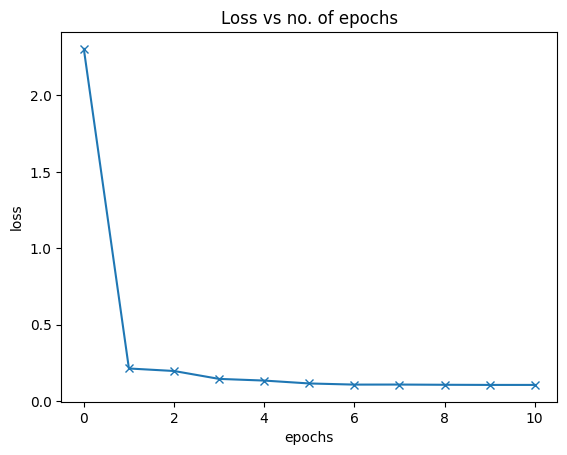

In [49]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, "-x")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss vs no. of epochs")

Text(0.5, 1.0, 'Accuracy vs no. of epochs')

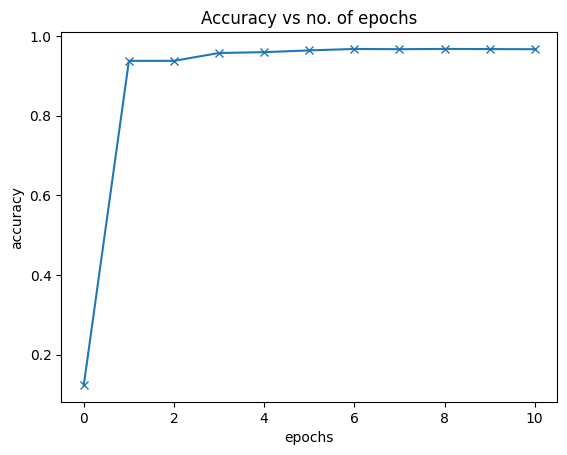

In [51]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, "-x")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy vs no. of epochs")

In [52]:
accuracies

[0.12392578274011612,
 0.937695324420929,
 0.937695324420929,
 0.957324206829071,
 0.95947265625,
 0.9638671875,
 0.967480480670929,
 0.9668945074081421,
 0.967578113079071,
 0.9671875238418579,
 0.966796875]

## Test with individual images

In [81]:
# Define test dataset
test_dataset = MNIST(root='data/', train=False, transform=ToTensor())

In [93]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7  Predicted:  7


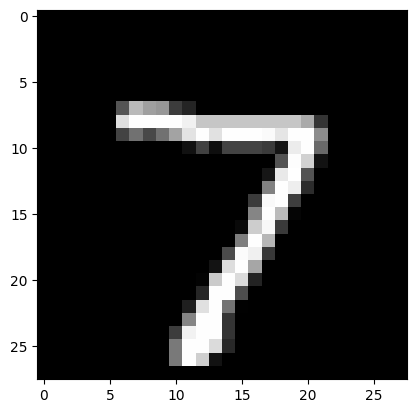

In [94]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap="gray")
print("Label:",label," Predicted: ",predict_image(img,model))

Label: 2  Predicted:  2


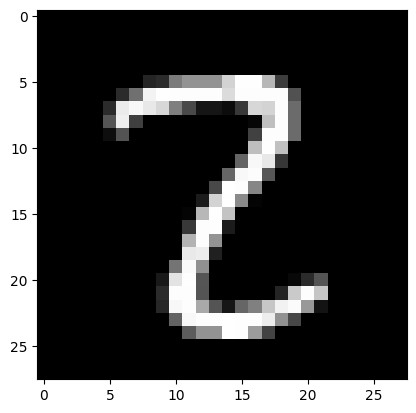

In [95]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap="gray")
print("Label:",label," Predicted: ",predict_image(img,model))

Label: 9  Predicted:  9


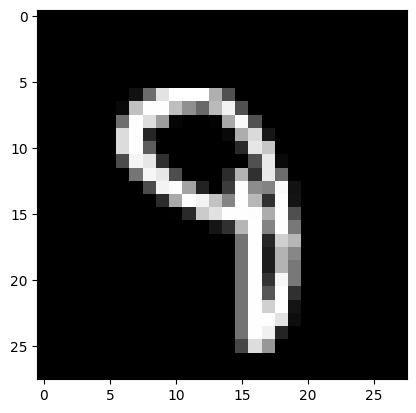

In [96]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap="gray")
print("Label:",label," Predicted: ",predict_image(img,model))

In [97]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size=256), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.0967438742518425, 'val_acc': 0.9703124761581421}

In [98]:
torch.save(model.state_dict(), "mnist-feedforward.pth")

# Image Classification with Convolutional Neural Networks 

In [1]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [2]:
# Download the dataset 
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, ".")

Using downloaded and verified file: ./cifar10.tgz


In [3]:
# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

In [4]:
data_dir = './data/cifar10/'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "train")
print(classes)

['train', 'test']
['horse', 'deer', 'dog', 'airplane', 'ship', 'automobile', 'truck', 'frog', 'cat', 'bird']


In [5]:
airplane_files = os.listdir(data_dir + 'train/airplane')
print('No. of training examples for airplanes:', len(airplane_files))
print(airplane_files[:5])

No. of training examples for airplanes: 5000
['0032.png', '3972.png', '4393.png', '1194.png', '3042.png']


In [6]:
ship_test_files = os.listdir(data_dir+"test/ship/")
print("No. of test examples for ship:", len(ship_test_files))
print(ship_test_files[:5])

No. of test examples for ship: 1000
['0032.png', '0430.png', '0498.png', '0441.png', '0650.png']


In [7]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [8]:
dataset = ImageFolder(data_dir+"train", transform=ToTensor())

In [9]:
img, label = dataset[25001]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 5


tensor([[[0.3961, 0.3686, 0.3843,  ..., 0.4745, 0.4980, 0.5608],
         [0.4706, 0.5137, 0.4863,  ..., 0.4510, 0.4745, 0.5647],
         [0.4706, 0.5451, 0.5490,  ..., 0.4118, 0.4196, 0.4745],
         ...,
         [0.1882, 0.1216, 0.1451,  ..., 0.7373, 0.6235, 0.4902],
         [0.2039, 0.1647, 0.1725,  ..., 0.6784, 0.6471, 0.5882],
         [0.1608, 0.1490, 0.1647,  ..., 0.6431, 0.5686, 0.6078]],

        [[0.4471, 0.4549, 0.4392,  ..., 0.4667, 0.5098, 0.5333],
         [0.4784, 0.5176, 0.4667,  ..., 0.4549, 0.4941, 0.5529],
         [0.4941, 0.5490, 0.5451,  ..., 0.3804, 0.4039, 0.4745],
         ...,
         [0.1765, 0.1216, 0.1451,  ..., 0.6157, 0.5098, 0.4157],
         [0.1804, 0.1569, 0.1765,  ..., 0.5294, 0.5333, 0.5176],
         [0.1647, 0.1490, 0.1608,  ..., 0.5098, 0.4706, 0.5255]],

        [[0.1373, 0.1882, 0.1647,  ..., 0.2275, 0.2588, 0.3529],
         [0.2510, 0.3843, 0.2902,  ..., 0.2078, 0.2471, 0.3020],
         [0.1961, 0.3216, 0.3216,  ..., 0.2196, 0.2392, 0.

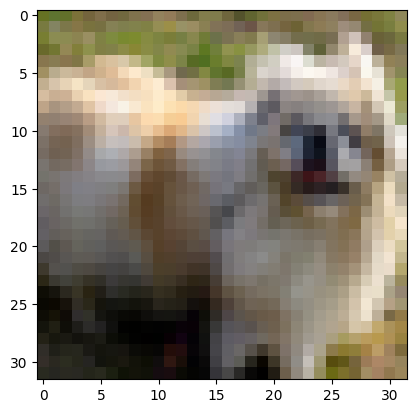

In [10]:
import matplotlib.pyplot as plt
plt.imshow(img.permute([1,2,0]))

In [11]:
dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [12]:
dataset.classes[0]

'airplane'

In [13]:
def show_example(img, label):
    print("Label:",dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute((1,2,0)))

Label: airplane (0)


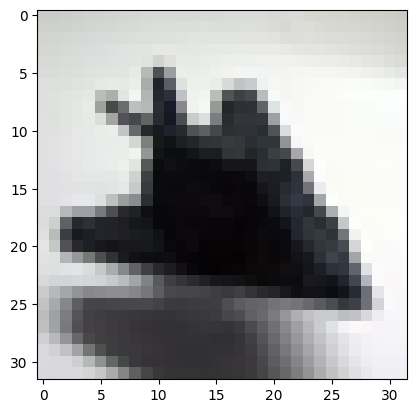

In [14]:
show_example(*dataset[0])

Label: airplane (0)


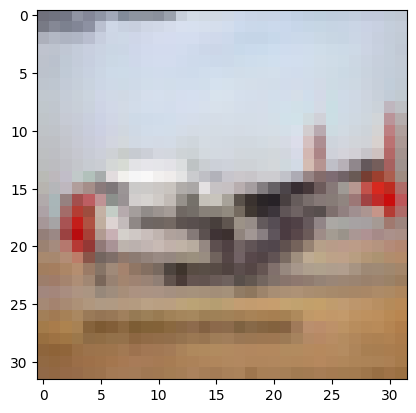

In [15]:
show_example(*dataset[1099])

# Training and Validation Dataset

In [16]:
random_seed = 42
torch.manual_seed(random_seed)

In [17]:
len(dataset)

50000

In [18]:
val_size = 5000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [19]:
from torch.utils.data.dataloader import DataLoader

batch_size = 128

In [20]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

In [21]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12,6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1,2,0))
        break

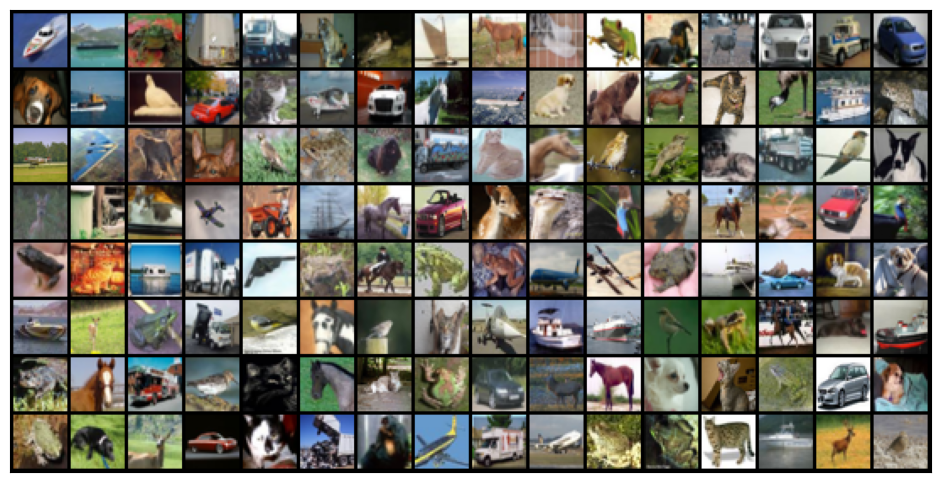

In [22]:
show_batch(train_dl)

# CNN

In [23]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0],
    [0, 0, 1, 3, 1],
    [3, 1, 2, 2, 3],
    [2, 0, 0, 2, 2],
    [2, 0, 0, 0, 1]
], dtype = torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2],
    [2, 2, 0],
    [0, 1, 2]
], dtype = torch.float32)

In [24]:
sample_image.shape

torch.Size([5, 5])

In [25]:
sample_image[2,4]

tensor(3.)

In [26]:
sample_image[2][3]

tensor(2.)

In [27]:
def apply_kernel(image, kernel):
    ri, ci = image.shape
    rk, ck = kernel.shape
    ro, co = ri-rk+1, ci-ck+1
    output = torch.zeros([ro, co])
    for i in range(ro):
        for j in range(co):
            output[i,j] = torch.sum(image[i:i+rk, j:j+ck] * kernel)
    return output

In [28]:
apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

In [29]:
import torch.nn as nn
import torch.nn.functional as F

In [30]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2,2)
)

In [31]:
for images, labels in train_dl:
    print('images.shape', images.shape)
    out = simple_model(images)
    print('out.shape', out.shape)
    break

images.shape torch.Size([128, 3, 32, 32])
out.shape torch.Size([128, 8, 16, 16])


In [32]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss':loss.detach(), 'val_acc':acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {"val_loss":epoch_loss.item(), "val_acc":epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
        

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [33]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 * 16 * 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2), # output: 128 * 8 * 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output 256 * 4 *4

            nn.Flatten(),
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
            
        )

    def forward(self, xb):
        return self.network(xb)        

In [34]:
model = Cifar10CnnModel()
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [35]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape torch.Size([128, 10])
out[0]: tensor([ 0.0239, -0.0466,  0.0067,  0.0193,  0.0044, -0.0598, -0.0188, -0.0242,
         0.0431, -0.0164], grad_fn=<SelectBackward0>)


In [36]:
dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [37]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device("cuda")
    else:
        return torch.device("cpu")


def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)  # No of batches

In [38]:
device = get_default_device()
device

device(type='cuda')

In [39]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device)

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [40]:
train_dl.__len__()

352

In [41]:
eval("5*5")

25

In [42]:
eval("5*2.2")

11.0

In [43]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training phase
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [44]:
model = to_device(Cifar10CnnModel(), device)

In [45]:
evaluate(model, val_dl)

{'val_loss': 2.302245855331421, 'val_acc': 0.10039062798023224}

In [46]:
# hyperparameters
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [47]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], val_loss: 1.3794, val_acc: 0.4859
Epoch [1], val_loss: 1.0749, val_acc: 0.6136
Epoch [2], val_loss: 0.9204, val_acc: 0.6704
Epoch [3], val_loss: 0.8489, val_acc: 0.7068
Epoch [4], val_loss: 0.7586, val_acc: 0.7285
Epoch [5], val_loss: 0.7775, val_acc: 0.7375
Epoch [6], val_loss: 0.7726, val_acc: 0.7483
Epoch [7], val_loss: 0.7372, val_acc: 0.7638
Epoch [8], val_loss: 0.8474, val_acc: 0.7682
Epoch [9], val_loss: 0.8728, val_acc: 0.7666


In [49]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs No. of epochs')

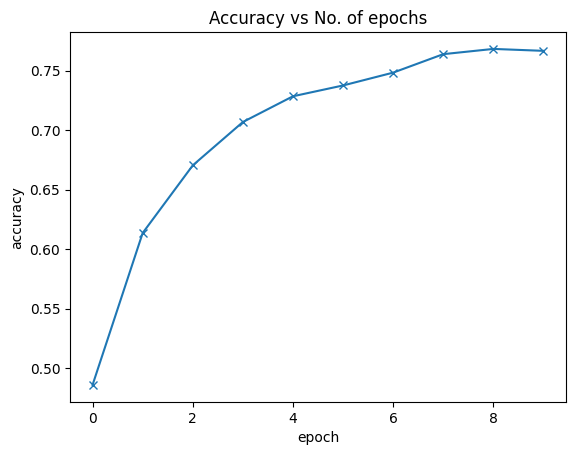

In [50]:
plot_accuracies(history)

In [55]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title("Loss vs. No of epochs")

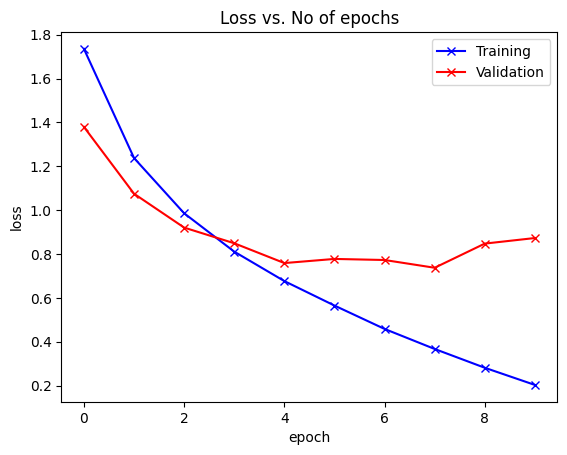

In [56]:
plot_losses(history)

In [58]:
torch.save(model.state_dict(), 'cnn.pth')

In [59]:
model.state_dict

<bound method Module.state_dict of Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (1

In [12]:
model.load_state_dict(torch.load('cnn.pth'))


NameError: name 'model' is not defined

In [46]:
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [47]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())

In [51]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick the index with highest probability
    _, preds = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

In [52]:
img, label = test_dataset[0]

In [53]:
img.shape

torch.Size([3, 32, 32])

Label: airplane Predicted: airplane


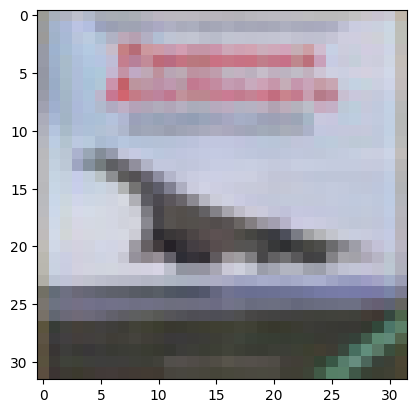

In [55]:
plt.imshow(img.permute(1,2,0))
print("Label:",dataset.classes[label], "Predicted:",predict_image(img,model))

Label: automobile Predicted: automobile


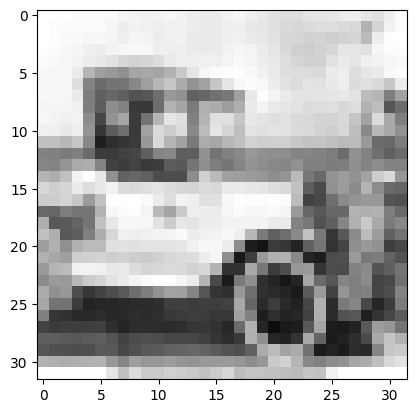

In [56]:
img, label = test_dataset[1002]
plt.imshow(img.permute(1,2,0))
print("Label:",dataset.classes[label], "Predicted:",predict_image(img,model))

Label: frog Predicted: frog


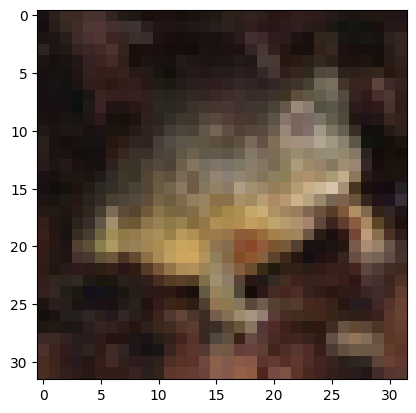

In [57]:
img, label = test_dataset[6153]
plt.imshow(img.permute(1,2,0))
print("Label:",dataset.classes[label], "Predicted:",predict_image(img,model))

Label: cat Predicted: horse


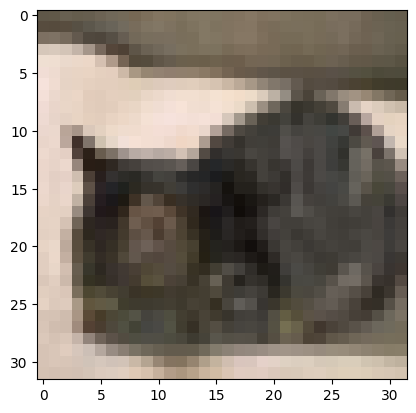

In [60]:
img, label = test_dataset[3012]
plt.imshow(img.permute(1,2,0))
print("Label:",dataset.classes[label], "Predicted:",predict_image(img,model))

In [61]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.8863232731819153, 'val_acc': 0.772753894329071}

# Data Augumentation, Regularization and ResNets

In [4]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [5]:
# Download the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

# Look into the data directory
data_dir = './data/cifar10'
print(os.listdir(data_dir))
classes = os.listdir(data_dir+'/train')
print(classes)

Using downloaded and verified file: ./cifar10.tgz
['train', 'test']
['horse', 'deer', 'dog', 'airplane', 'ship', 'automobile', 'truck', 'frog', 'cat', 'bird']


In [6]:
# Data transforms (normalization and data augmentation)
stats = ((0.4914, 0.4822, 0.4465), (0.2323, 0.1994, 0.2010))
train_tfms = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'),
                        tt.RandomHorizontalFlip(),
                        tt.ToTensor(),
                        tt.Normalize(*stats, inplace=True)])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats, inplace=True)])

In [7]:
# Pytorch datasets 
train_ds = ImageFolder(data_dir+'/train', train_tfms)
valid_ds = ImageFolder(data_dir+'/test', valid_tfms)

In [8]:
batch_size = 200

In [9]:
# Pytorch Dataloaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=3, pin_memory=True)

In [10]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12,12))
        ax.set_xticks([]);ax.set_yticks([])
        ax.imshow(make_grid(images[:64], nrow=8).permute(1,2,0))
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


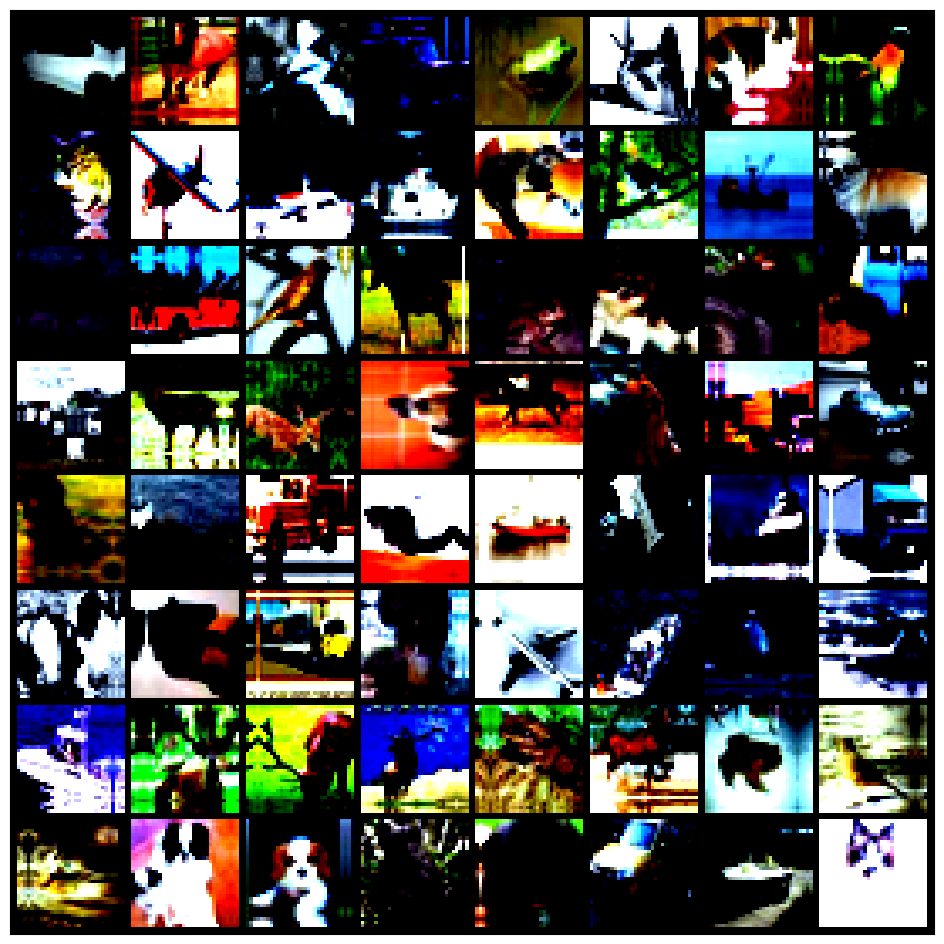

In [11]:
show_batch(train_dl)

In [12]:
# Using GPU
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)

In [13]:
device = get_default_device()
device

device(type='cuda')

In [14]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [15]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x  # ReLU can be applied before or after adding the input

In [16]:
simple_resnet = to_device(SimpleResidualBlock(), device)

for images, labels in train_dl:
    print(images.shape)
    out = simple_resnet(images)
    print(out.shape)
    break

del simple_resnet, images, labels
torch.cuda.empty_cache()

torch.Size([200, 3, 32, 32])
torch.Size([200, 3, 32, 32])


In [17]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)      # Generate Predictions
        loss = F.cross_entropy(out, labels)    # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss.detach(), 'val_acc':acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch[{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']
        ))

In [18]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
              nn.BatchNorm2d(out_channels),
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        # Input: 3*32*32
        self.conv1 = conv_block(in_channels, 64) # 64 * 32 * 32
        self.conv2 = conv_block(64, 128, pool=True) # 128 * 16 * 16
        self.res1 = nn.Sequential(
            conv_block(128, 128),
            conv_block(128, 128)      # 128 * 16 * 16
        )
        self.conv3 = conv_block(128, 256, pool=True)  # 256 * 8 * 8
        self.conv4 = conv_block(256, 512, pool=True)  # 512 * 4 * 4
        self.res2 = nn.Sequential(
            conv_block(512, 512),
            conv_block(512, 512)   # 512 * 4 * 4
        )
        self.classifier = nn.Sequential(
            nn.MaxPool2d(4),  # 512 * 1 * 1
            nn.Flatten(),     # 512
            nn.Linear(512, num_classes)
        )

    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [19]:
model = to_device(ResNet9(3, 10), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [20]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    # Set up custom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            # Gradient Clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # Record and update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()

        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [21]:
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 2.3068861961364746, 'val_acc': 0.10000000149011612}]

In [22]:
epochs = 8
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [23]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl,
                         grad_clip=grad_clip,
                         weight_decay=weight_decay,
                         opt_func=opt_func)

Epoch[0], last_lr: 0.00394, train_loss: 1.2727, val_loss: 1.1136, val_acc: 0.6168
Epoch[1], last_lr: 0.00935, train_loss: 0.9851, val_loss: 1.0836, val_acc: 0.6605
Epoch[2], last_lr: 0.00972, train_loss: 0.7821, val_loss: 1.1733, val_acc: 0.6369
Epoch[3], last_lr: 0.00812, train_loss: 0.5939, val_loss: 0.5589, val_acc: 0.8132
Epoch[4], last_lr: 0.00556, train_loss: 0.4849, val_loss: 0.5048, val_acc: 0.8337
Epoch[5], last_lr: 0.00283, train_loss: 0.3822, val_loss: 0.4106, val_acc: 0.8600
Epoch[6], last_lr: 0.00077, train_loss: 0.2702, val_loss: 0.3061, val_acc: 0.8956
Epoch[7], last_lr: 0.00000, train_loss: 0.1857, val_loss: 0.2696, val_acc: 0.9090
CPU times: user 6min 29s, sys: 54.9 s, total: 7min 24s
Wall time: 58min 44s


In [24]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.title('Accuracy vs No. of epochs')

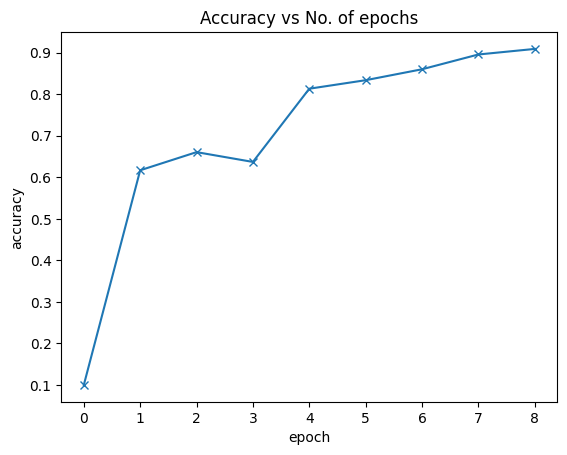

In [25]:
plot_accuracies(history)

In [26]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs No. of epochs')

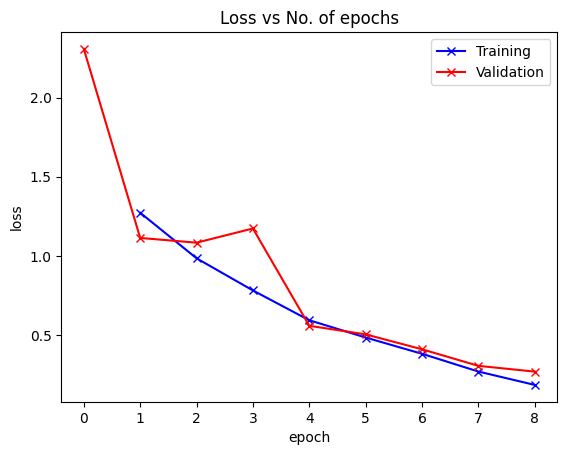

In [27]:
plot_losses(history)

In [28]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning Rate')
    plt.title('Learning Rate vs Batch no.')

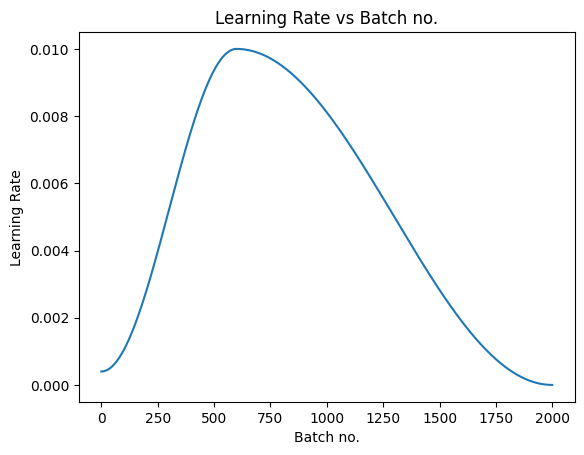

In [29]:
plot_lrs(history)

# Testing with individual image

In [30]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds = torch.max(yb, dim=1)
    # Retrive the class label
    return train_ds.classes[preds[0].item()]

Label: airplane Predicted: airplane


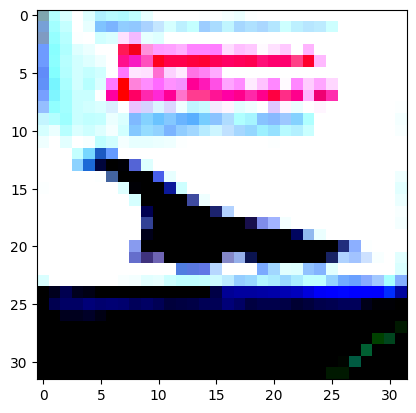

In [34]:
img, label = valid_ds[0]
plt.imshow(img.permute(1,2,0).clamp(0,1))
print('Label:',train_ds.classes[label], 'Predicted:',predict_image(img, model))

Label: automobile Predicted: truck


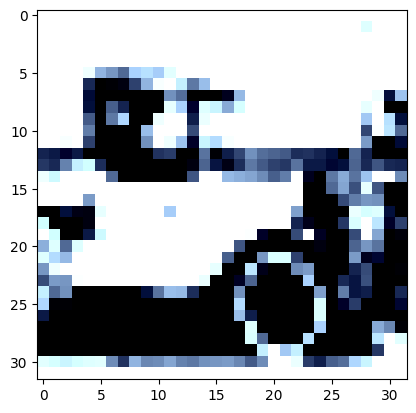

In [35]:
img, label = valid_ds[1002]
plt.imshow(img.permute(1,2,0).clamp(0,1))
print('Label:',train_ds.classes[label], 'Predicted:',predict_image(img, model))

Label: frog Predicted: frog


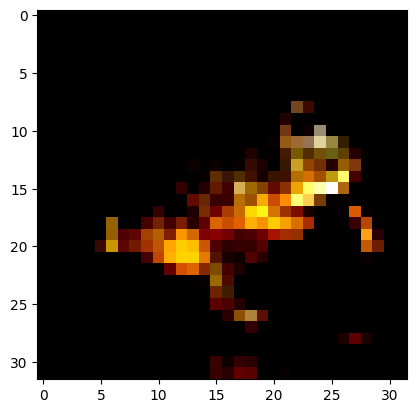

In [36]:
img, label = valid_ds[6153]
plt.imshow(img.permute(1,2,0).clamp(0,1))
print('Label:',train_ds.classes[label], 'Predicted:',predict_image(img, model))

## Saving our model

In [37]:
torch.save(model.state_dict(),'cifar10-resnet9.pth')

# Image Generation using GANs

In [39]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/splcher/animefacedataset'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  sijanpaudel


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/splcher/animefacedataset


100%|████████████████████████████████████████| 395M/395M [03:03<00:00, 2.26MB/s]


In [1]:
import os

DATA_DIR = './animefacedataset/'
print(os.listdir(DATA_DIR))

['images']


In [2]:
print(os.listdir(DATA_DIR+'images')[:10])

['22495_2008.jpg', '13999_2006.jpg', '51198_2015.jpg', '27712_2009.jpg', '51851_2015.jpg', '14205_2006.jpg', '350_2000.jpg', '14652_2006.jpg', '30065_2010.jpg', '30272_2010.jpg']


In [3]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

In [4]:
image_size = 64
batch_size = 128
stats = ((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

In [5]:
train_ds = ImageFolder(DATA_DIR, transform=T.Compose([
    T.Resize(image_size),
    T.CenterCrop(image_size),
    T.ToTensor(),
    T.Normalize(*stats)
]))

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)

In [6]:
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [7]:
def denorm(img_tensors):
    return img_tensors * stats[1][0] + stats[0][0]

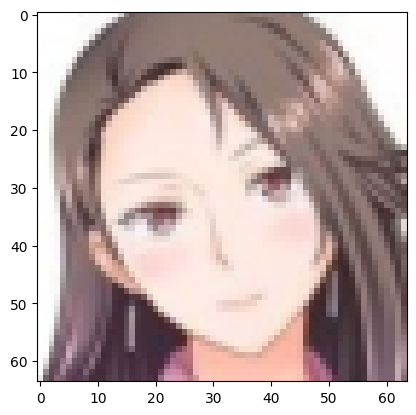

In [61]:
plt.imshow(denorm(list(train_dl)[0][0][0]).permute(1,2,0))

In [8]:
list(train_dl)[0][0][0].shape

torch.Size([3, 64, 64])

In [8]:
def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_xticks([]);ax.set_yticks([])
    ax.imshow(make_grid(denorm(images.detach()[:nmax]), nrow=8).permute(1,2,0))

def show_batch(dl, nmax=64):
    for images, _ in dl:
        show_images(images, nmax)
        break

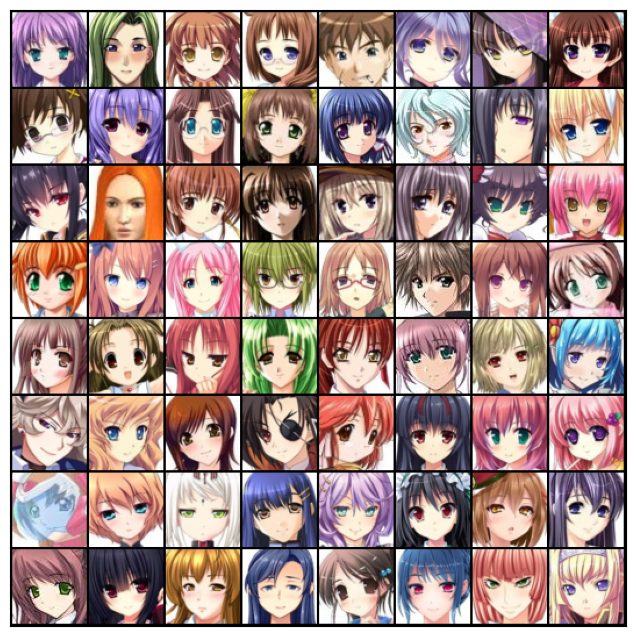

In [9]:
show_batch(train_dl)

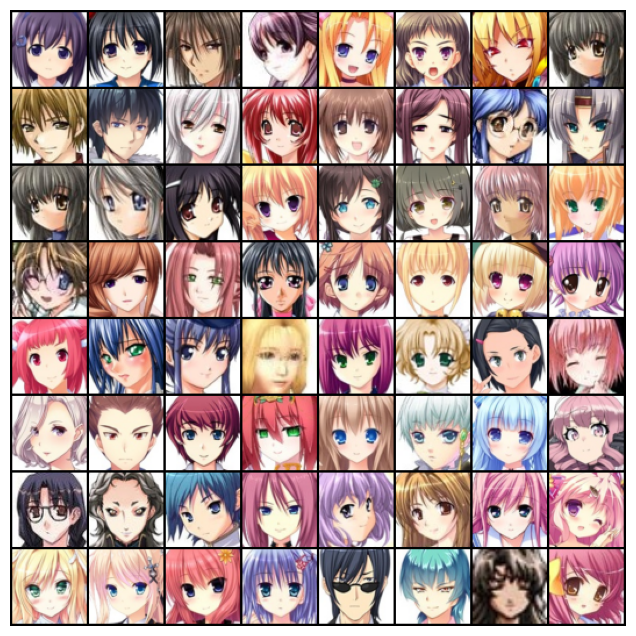

In [10]:
plt.figure(figsize=(8,8))
plt.imshow(make_grid(denorm(list(train_dl)[0][0].detach()[:64]), nrow=8).permute(1, 2, 0))
plt.axis("off")
plt.show()

# Using a GPU

In [11]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        torch.device('cpu')

def to_device(data, device):
    '''Move tensor(s) to choosen device'''
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader:
    """Wrap a dataloader to move data a a device"""
    def __init__(self,dl,device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [12]:
device = get_default_device()
device

device(type='cuda')

In [13]:
train_dl = DeviceDataLoader(train_dl, device)

# Discriminator Network
 The discriminator takes an image as input, and tries to classify it as "real" or "generated". Here we use stride of 2 to to progressively reduce the size of the output feature map.

In [14]:
import torch.nn as nn

In [15]:
discriminator = nn.Sequential(
    # in : 3 * 64 * 64
    nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 64 * 32 * 32

    nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 128 * 16 * 16

    nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 256 * 8 * 8

    nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(512),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 512 * 4 * 4

    nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0, bias=False),
    # out: 1 * 1 * 1

    nn.Flatten(),
    nn.Sigmoid()
)

In [16]:
discriminator = to_device(discriminator, device)

# Generator Network

In [17]:
latent_size = 128

In [18]:
generator = nn.Sequential(
    # in: latent_size * 1 * 1

    nn.ConvTranspose2d(latent_size, 512, kernel_size=4, stride=1, padding=0, bias=False),
    nn.BatchNorm2d(512),
    nn.ReLU(True),
    # out: 512 * 4 * 4

    nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.ReLU(True),
    # out: 256 * 8 * 8

    nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.ReLU(True),
    # out: 128 * 16 * 16

    nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(True),
    # out: 64 * 32 * 32

    nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
    nn.Tanh()
    # out: 3 * 64 * 64
    
)

torch.Size([128, 3, 64, 64])


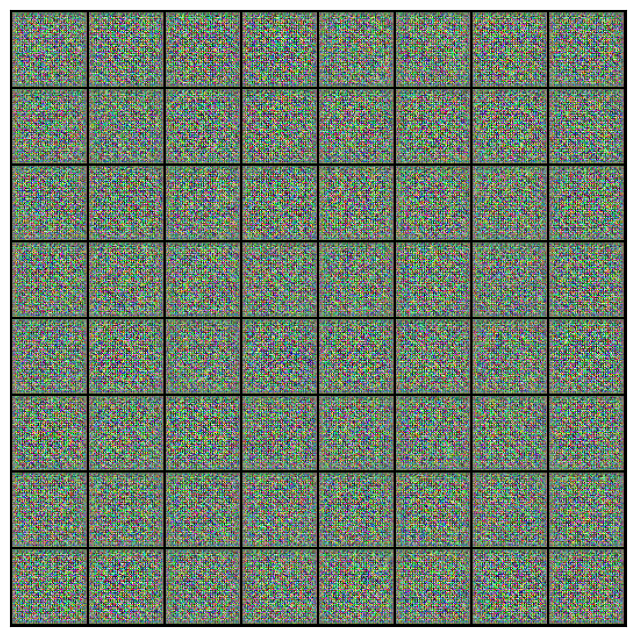

In [19]:
xb = torch.randn(batch_size, latent_size, 1, 1) # random latent tensors
fake_images = generator(xb)
print(fake_images.shape)
show_images(fake_images)

In [20]:
generator = to_device(generator, device)

In [21]:
def train_discriminator(real_images, opt_d):
    # Clear discriminator gradients
    opt_d.zero_grad()

    # Pass real images through discriminator
    real_preds = discriminator(real_images)
    real_targets = torch.ones(real_images.size(0), 1, device=device)
    real_loss = F.binary_cross_entropy(real_preds, real_targets)
    real_score = torch.mean(real_preds).item()

    # Generate fake images
    latent = torch.ones(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(latent)

    # Pass fake images through discriminator
    fake_targets = torch.zeros(fake_images.size(0), 1, device=device)
    fake_preds = discriminator(fake_images)
    fake_loss = F.binary_cross_entropy(fake_preds, fake_targets)
    fake_score = torch.mean(fake_preds).item()

    # Update discriminator weights
    loss = real_loss + fake_loss
    loss.backward()
    opt_d.step()
    return loss.item(), real_score, fake_score

In [22]:
def train_generator(opt_g):
    # Clear generator gradients
    opt_g.zero_grad()

    # Generate fake images
    latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(latent)

    # Try to fool the discriminator
    preds = discriminator(fake_images)
    targets = torch.ones(batch_size, 1, device=device)
    loss = F.binary_cross_entropy(preds, targets)

    # Update generator weights
    loss.backward()
    opt_g.step()

    return loss.item()

In [23]:
from torchvision.utils import save_image

In [24]:
sample_dir = 'generated'
os.makedirs(sample_dir, exist_ok=True)

In [25]:
def save_samples(index, latent_tensors, show=True):
    fake_images = generator(latent_tensors)
    fake_fname = 'generated-images-{0:0=4d}.png'.format(index)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=8)
    print('Saving', fake_fname)
    if show:
        fig, ax = plt.subplots(figsize=(8,8))
        ax.set_xticks([]);ax.set_yticks([])
        ax.imshow(make_grid(fake_images.cpu().detach(), nrow=8).permute(1,2,0))

In [26]:
fixed_latent = torch.randn(64, latent_size, 1, 1, device=device)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Saving generated-images-0000.png


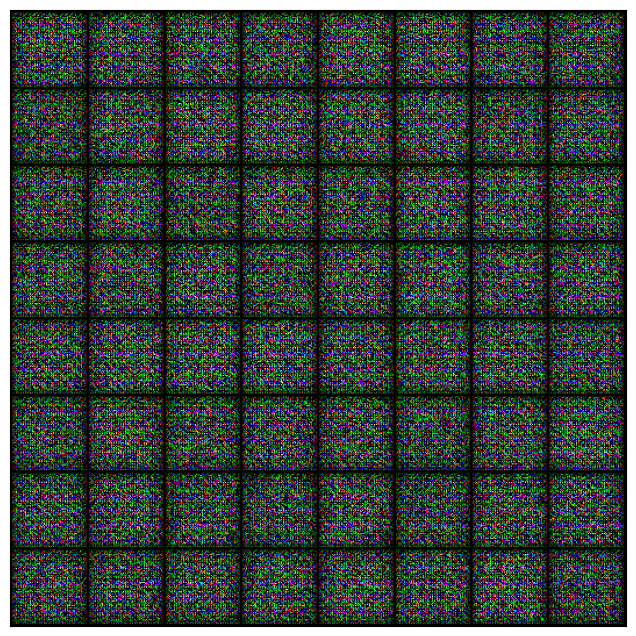

In [27]:
save_samples(0, fixed_latent)

In [28]:
from tqdm.notebook import tqdm
import torch.nn.functional as F

In [29]:
def fit(epochs, lr, start_idx=1):
    torch.cuda.empty_cache()

    # Losses and scores
    losses_g = []
    losses_d = []
    real_scores = []
    fake_scores = []

    # Create optimizers
    opt_d = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))
    opt_g = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))

    for epoch in range(epochs):
        for real_images, _ in tqdm(train_dl):
            # Train discriminator
            loss_d, real_score, fake_score = train_discriminator(real_images,opt_d)
            # Train generator
            loss_g = train_generator(opt_g)

        # Record losses and scores
        losses_g.append(loss_g)
        losses_d.append(loss_d)
        real_scores.append(real_score)
        fake_scores.append(fake_score)

        # Log losses & scores (last batch)
        print("Epoch [{}/{}], loss_g: {:.4f}, loss_d: {:.4f}, real_score: {:.4f}, fake_score: {:.4f}".format(
            epoch+1, epochs, loss_g, loss_d, real_score, fake_score))

        # Save generated images
        save_samples(epoch+start_idx, fixed_latent, show=False)

    return losses_g, losses_d, real_scores, fake_scores

In [30]:
lr = 0.002
epochs = 5

In [31]:
history = fit(epochs, lr)

  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [1/5], loss_g: 0.0000, loss_d: 0.0001, real_score: 1.0000, fake_score: 0.0000
Saving generated-images-0001.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [2/5], loss_g: 0.0000, loss_d: 0.0000, real_score: 1.0000, fake_score: 0.0000
Saving generated-images-0002.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [3/5], loss_g: 0.0000, loss_d: 0.0000, real_score: 1.0000, fake_score: 0.0000
Saving generated-images-0003.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [4/5], loss_g: 0.0000, loss_d: 0.0000, real_score: 1.0000, fake_score: 0.0000
Saving generated-images-0004.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [5/5], loss_g: 0.0000, loss_d: 0.0000, real_score: 1.0000, fake_score: 0.0000
Saving generated-images-0005.png


In [39]:
lr = 0.0002
epochs = 5

In [2]:
from PIL import Image
import torchvision.transforms as transforms
import torch

In [3]:
image_path = 'generated/generated-images-0005.png'
image = Image.open(image_path)

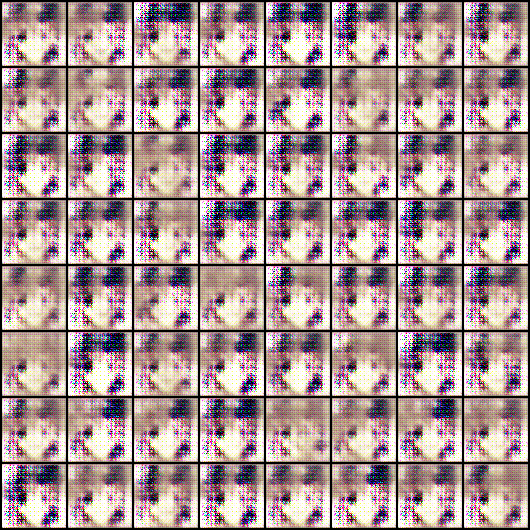

In [4]:
image